In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51980_R')

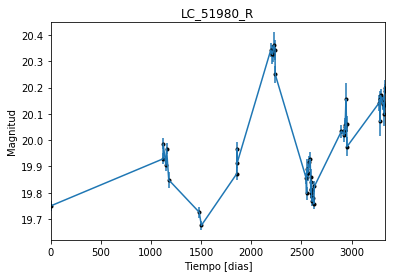

In [2]:
data = np.genfromtxt('LC_51980_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51980_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

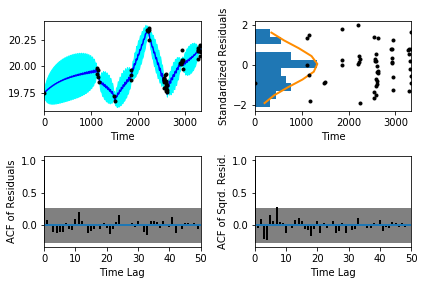

In [5]:
sample.assess_fit()

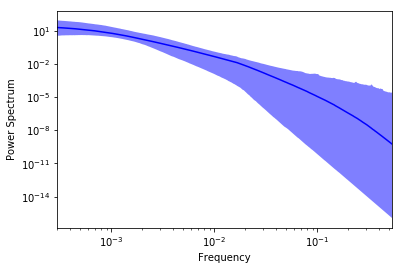

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51980_R')

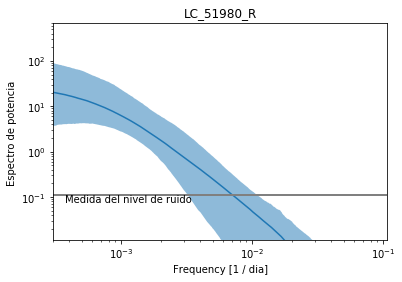

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51980_R')

Text(0.5,1,'Prediccion , valor esperado LC_51980_R')

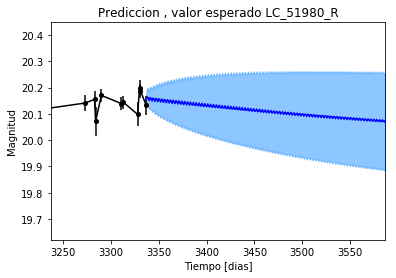

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51980_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_51980_R')

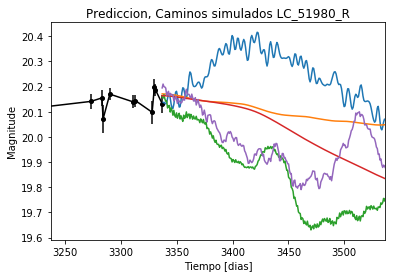

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51980_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51980_R')

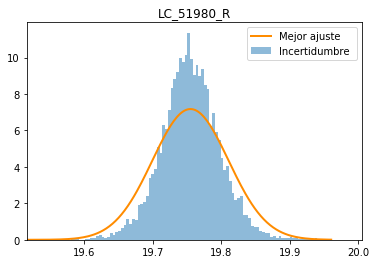

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51980_R')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_R')

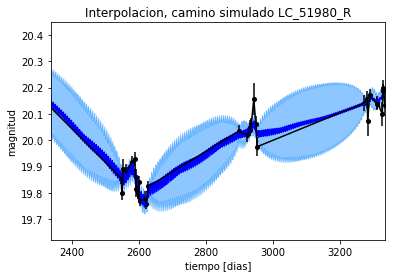

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_R')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_R')

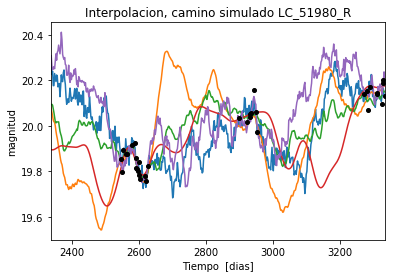

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 672.071437047
Median: 0.014081577615
Standard deviation: 0.207657128952
68% credibility interval: [ 0.00082475  0.21141483]
95% credibility interval: [  3.25982729e-04   8.36876647e-01]
99% credibility interval: [  3.05834128e-04   1.02000857e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 467.467710235
Median: 0.00532607931996
Standard deviation: 0.109639970806
68% credibility interval: [ 0.00054736  0.05953175]
95% credibility interval: [  3.20094679e-04   3.96474014e-01]
99% credibility interval: [  3.05204821e-04   7.38917162e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 562.797002202
Median: 0.0275675028998
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2568.70938773
Median: 89.3374726142
Standard deviation: 1.84462908408
68% credibility interval: [ 87.319902    90.71678459]
95% credibility interval: [ 84.66324358  92.01016254]
99% credibility interval: [ 82.721001    93.49680196]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 533.487894169
Median: 0.650040671553
Standard deviation: 2.56178470425
68% credibility interval: [ 0.07488791  4.53217725]
95% credibility interval: [ 0.01396748  8.80131862]
99% credibility interval: [  9.58914760e-03   1.23156215e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 739.866128711
Median: 1.66986207155
Standard deviation: 11.9920461942
68% credibility interval: [  0.03880311  16.13557403]
95% credibility interval: [  6.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6026.61671858
Median: 8.24297602916e-27
Standard deviation: 1.78515627353e+28
68% credibility interval: [  1.97093470e-55   3.44635813e-06]
95% credibility interval: [  1.82516298e-75   2.73980867e+10]
99% credibility interval: [  3.85016798e-84   5.35910011e+15]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2415.72496768
Median: 19.9490923348
Standard deviation: 0.104005710906
68% credibility interval: [ 19.85414653  20.03640507]
95% credibility interval: [ 19.73330143  20.14816779]
99% credibility interval: [ 19.60885553  20.26686208]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1297.91061727
Median: 0.0700195878711
Standard deviation: 0.285687027131
68% credibility interval: [ 0.          0.54021122]
95% credibility interval: [ 0.          0.97750877]
99% credibility interval: [ 0.          1.04071358]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1297.91061727
Median: 0.0700195878711
Standard deviation: 0.285687027131
68% credibility interval: [ 0.          0.54021122]
95% credibility interval: [ 0.          0.97750877]
99% credibility interval: [ 0.          1.04071358]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 667.674995619
Median: 0.0
Standard deviation: 0.000404907300463
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2568.70938773
Median: 89.3374726142
Standard deviation: 1.84462908408
68% credibility interval: [ 87.319902    90.71678459]
95% credibility interval: [ 84.66324358  92.01016254]
99% credibility interval: [ 82.721001    93.49680196]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 868.308729408
Median: 0.0458196597832
Standard deviation: 0.0429635257246
68% credibility interval: [ 0.02883565  0.07805153]
95% credibility interval: [ 0.01930952  0.15633268]
99% credibility interval: [ 0.01607699  0.27880703]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 820.192862796
Median: 1.24408724933
Standard deviation: 0.240498121662
68% credibility interval: [ 1.01733624  1.51030719]
95% credibility interval: [ 0.85731063  1.78952631]
99% credibility interval: [ 0.77002549  1.91801313]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 611.122488709
Median: 0.00230029368219
Standard deviation: 0.322582847181
68% credibility interval: [  9.48056000e-06   6.28061954e-02]
95% credibility interval: [  2.26112955e-14   8.11452368e-01]
99% credibility interval: [  5.29934467e-20   2.31523813e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 672.071437047
Median: (-0.0884771615726+0j)
Standard deviation: 2.21911716449
68% credibility interval: [-1.32835858-5.4359614j -0.00518207-0.0797741j]
95% credibility interval: [ -5.25825105e+00-3.41589297j  -2.04820989e-03-0.12509142j]
99% credibility interval: [ -6.40890286e+00+0.j          -1.92161250e-03-0.07587919j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 467.467710235
Median: (-0.033464743328+3.67794086522j)
Standard deviation: 1.92267524404
68% credibility interval: [-0.37404899+0.j -0.00343917+0.j]
95% credibility interval: [ -2.49111970e+00+1.38840465j  -2.01121418e-03+4.16125711j]
99% credibility interval: [ -4.64275346e+00 +3.77648917e+00j  -1.91765845e-03 +2.97856819e-03j]
Posterior summary for par